In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

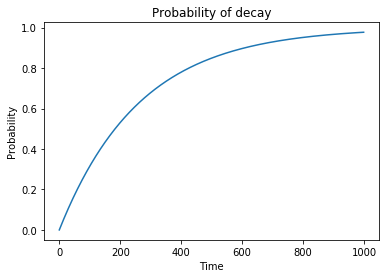

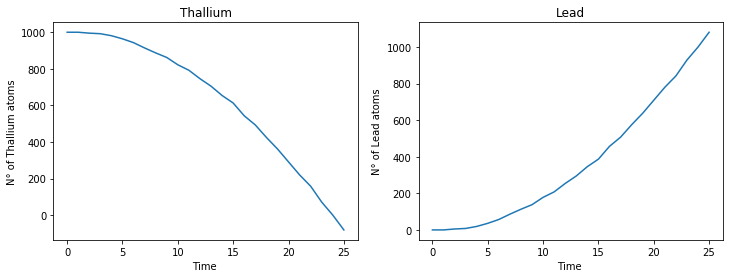

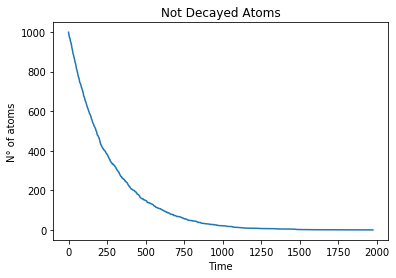

In [32]:
np.random.seed(2012266)

tau=3.052*60 #half-life in seconds

t=np.arange(0,1000) #array of seconds

#define probability function
def prob(x):
    return 1 - 2**(-x/tau)

#plot probability distribution
plt.figure(1)
plt.plot(t,prob(t))
plt.title("Probability of decay")
plt.ylabel("Probability")
plt.xlabel("Time")

#lists of evolution numbers of atoms
TL=[1000]
PB=[0]

for second in t: #at each step in time
    
    n_decays=0
    for i in range(TL[0]): #for each atom
        if np.random.random()<prob(second):n_decays+=1 #counting one decay
    if(TL[-1]<0):break #continue until the end of atoms
        
    TL.append(TL[-1]-n_decays)
    PB.append(PB[-1]+n_decays)
        
TL=np.asarray(TL)
PB=np.asarray(PB)

t=np.arange(0,len(TL))
#plot evolution of the two sets
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,4))

ax1.plot(t,TL)
ax1.set_ylabel("N° of Thallium atoms")
ax1.set_xlabel("Time ")
ax1.set_title("Thallium")

ax2.plot(t,PB)
ax2.set_ylabel("N° of Lead atoms")
ax2.set_xlabel("Time ")
ax2.set_title("Lead")

plt.show()


#INVERSE TRANSFORM METHOD

t=np.random.random(1000) #uniformly distributed
t=np.sort(t)

x=-(tau/np.log(2))*np.log(1-t) #numbers from defined probability distribution

not_decayed=np.flip(np.arange(0,len(x)))

plt.figure(2)
plt.plot(x,not_decayed)
plt.ylabel("N° of atoms")
plt.xlabel("Time")
plt.title("Not Decayed Atoms")
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [33]:
#beam distribution
N=1000000
z=np.random.random(N) #uniform distribution

r0=5.3e-11 #m
sigma=r0/100

#gaussian from uniform distribution
r=np.sqrt(-2*(sigma**2)*np.log(z))
phi=2*np.pi*np.random.random(N)

x=r*np.cos(phi)
y=r*np.sin(phi)

#compute fraction of particles that bounce back
elec=1.602176634e-19
Z=79
E=7.7e6*elec #MeV
eps0=8.854e-12 #F/m

n_part=0

#condition on impact parameter
b_max=(Z*elec**2)/(2*np.pi*eps0*E)

for i in range(N):
    if r[i]<b_max:n_part+=1 #tan(thetha/2)>1; condition to bounce-back angle
        
print("Bounced-back particles (%):",n_part*100/N)

Bounced-back particles (%): 0.1507


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

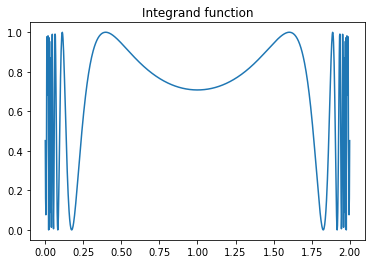

Hit/Miss result: 1.4544
Mean Value result: 1.4514778201710257
Hit/Miss error (%): 0.20627062706269883
Mean Value error (%): 0.005361444036153089


In [20]:
#define the function
def f(x):
    den=x*(2-x)
    result=(np.sin(1/den))**2
    return result

#plot the function
x=np.linspace(0.001,1.999,1000)

plt.figure(1)
plt.title("Integrand function")
plt.plot(x,f(x))
plt.show()

#hit/miss method
np.random.seed(2012266)

N=10000
hit=0

for i in range(N):
    y=np.random.random() #uniformly distributed numbers in [0,1]
    x=2*np.random.random() #uniformly distributed numbers in [0,2]
    if y<f(x):hit+=1
        
integral_hit=2*hit/N
print("Hit/Miss result:",integral_hit)


#mean value method
summ=0

for i in range(N):
    x=2*np.random.random()
    summ+=f(x)

integral_mean=2*summ/N
print("Mean Value result:",integral_mean)

#compute errors
correct_result=1.4514

print("Hit/Miss error (%):",np.abs(correct_result-integral_hit)*100/integral_hit)
print("Mean Value error (%):",np.abs(correct_result-integral_mean)*100/integral_mean)

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [7]:
#circle of radius 1 in 2D
def circle(x,y):
    if x**2 + y**2 <=1: result=1
    else: result=0
    return result

#integration in 2D with mean value method
N=100000
sign=np.array([-1,1])
dimensions=2
mean=0

for i in range(N):
    x=np.random.choice(sign)*np.random.random()
    y=np.random.choice(sign)*np.random.random()
    mean+=circle(x,y)
    
volume=2**dimensions
integral=volume*mean/N
print("Integral of 2D circle:",integral)

#10D sphere
def sphere_10D(a,b,c,d,e,f,g,h,i,l):
    if a**2+b**2+c**2+d**2+e**2+f**2+g**2+h**2+i**2+l**2<=1: result=1
    else: result=0
    return result

#integration with mean value method
mean=0
dimensions=10
M=100000

for i in range(M):
    v=np.zeros((10))
    for j in range(10):v[j]=np.random.choice(sign)*np.random.random()
 
    mean+=sphere_10D(v[0],v[1],v[2],v[3],v[4],v[5],v[6],v[7],v[8],v[9])
    
volume=2**dimensions
integral=volume*mean/M
print("Integral of 10D sphere:",integral)

#check result
def gamma_eulero(n):
    result=1
    while n!=1:
        result*=(n-1)
        n=n-1
    return result

def eucl_vol(n):
    num=np.pi**(n/2)
    den=gamma_eulero(n/2+1)
    return num/den

print("Analytical Volume of 10D sphere:",eucl_vol(dimensions))

Integral of 2D circle: 3.14532
Integral of 10D sphere: 2.7648
Analytical Volume of 10D sphere: 2.550164039877345


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [18]:
#define samples
N=100000
z=np.random.random(N) #uniformly distributed

x=(z**2) #extracted from w(x) distribution, I removed a /4 to stay in the [0,1] range

#integrand function
integrand=(x**(-1/2))/(np.exp(x)+1)

#weight function
w=1/np.sqrt(x)

weight_integral=2

#compute integral with generalized mean method
mean=0
for i in range(N):mean+=integrand[i]/w[i]

integral=mean*weight_integral/N
print("Integral with importance sampling:",integral,"(0.84)")

Integral with importance sampling: 0.8384928367959337 (0.84)
